In [ ]:
#Entrenamiento de Red Neuronal Convolucional.
#Mauricio Sifuentes Rincón 2007693 Hora clase N4

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.15.0


In [ ]:
keras.datasets.mnist.load_data(path="mnist.npz")
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

11490434/11490434 [==============================] - 0s 0us/step


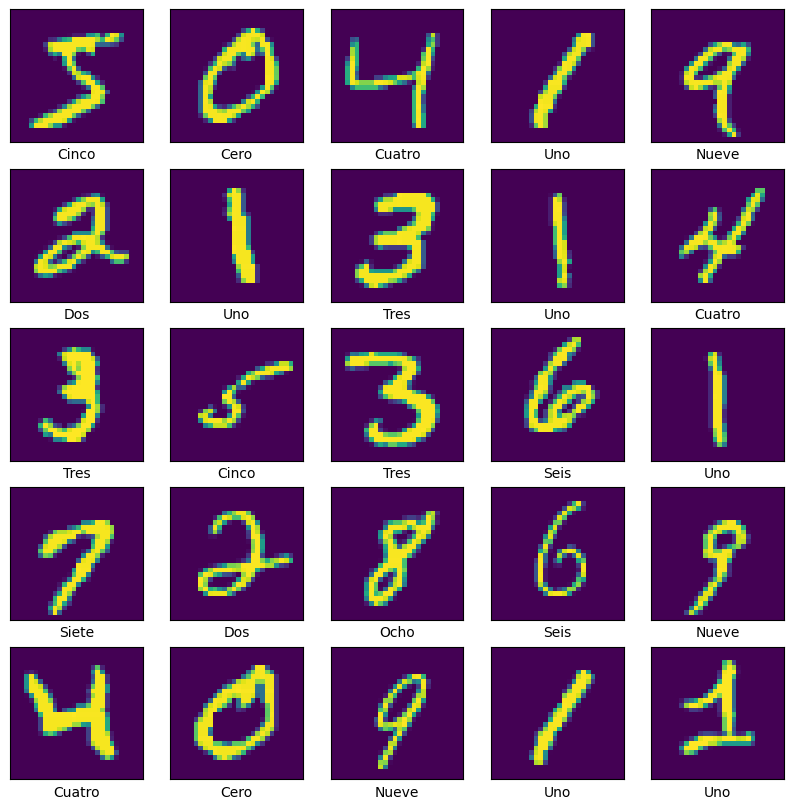

In [ ]:
class_names = ['Cero', 'Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco', 'Seis', 'Siete','Ocho', 'Nueve']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [ ]:

model = models.Sequential()
model.add(layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(56, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(56, (3, 3), activation='softmax'))

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(56, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 60s 31ms/step - loss: 0.2756 - accuracy: 0.9211 - val_loss: 0.0747 - val_accuracy: 0.9775
Epoch 2/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0633 - accuracy: 0.9810 - val_loss: 0.0448 - val_accuracy: 0.9861
Epoch 3/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0443 - accuracy: 0.9867 - val_loss: 0.0383 - val_accuracy: 0.9878
Epoch 4/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0335 - accuracy: 0.9895 - val_loss: 0.0360 - val_accuracy: 0.9880
Epoch 5/10
1875/1875 [==============================] - 55s 30ms/step - loss: 0.0284 - accuracy: 0.9913 - val_loss: 0.0322 - val_accuracy: 0.9901
Epoch 6/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0217 - accuracy: 0.9932 - val_loss: 0.0335 - val_accuracy: 0.9888
Epoch 7/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0177 - accuracy: 0.9944 - val_loss: 0.0310 - val_accura

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 4s - loss: 0.0349 - accuracy: 0.9897 - 4s/epoch - 13ms/step

Test accuracy: 0.9897000193595886


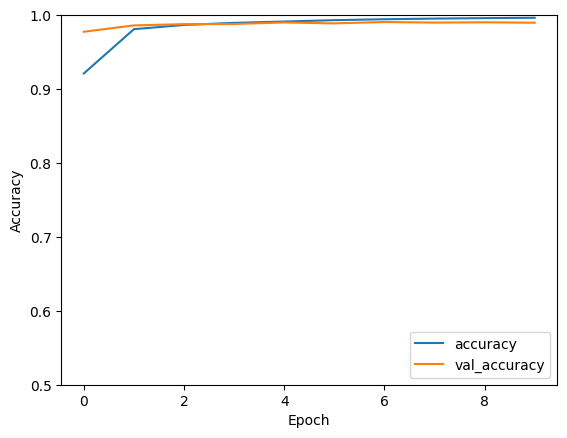

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
predictions = model.predict(test_images)

313/313 [==============================] - 4s 11ms/step


In [ ]:
# Prediccion 1
predictions[0]

array([2.1040376e-13, 5.3298294e-08, 4.8458242e-07, 7.4114780e-07,
       2.2927814e-08, 1.8861893e-11, 1.4226912e-13, 9.9999875e-01,
       1.1097544e-10, 1.6055086e-08], dtype=float32)

In [ ]:
np.argmax(predictions[0])

7

In [ ]:
test_labels[0]

7

In [ ]:
predictions[5]

array([8.8031280e-09, 9.9998647e-01, 8.4872181e-07, 6.5903207e-09,
       1.8226349e-06, 8.4984080e-08, 1.0419216e-08, 8.1266489e-06,
       2.0193556e-06, 4.3771405e-07], dtype=float32)

In [ ]:

np.argmax(predictions[5])

1

In [ ]:

test_labels[5]

1

In [ ]:
#prediccion 2
predictions[42]

array([8.5822355e-10, 3.9747636e-09, 1.1099509e-08, 1.0861244e-12,
       9.9997646e-01, 2.1949901e-12, 2.6479933e-11, 1.3430228e-08,
       1.0671434e-06, 2.2473381e-05], dtype=float32)

In [ ]:
np.argmax(predictions[42])

4

In [ ]:

test_labels[42]

4

In [ ]:
#prediccion 3
predictions[26]

array([1.6852414e-11, 4.9651728e-08, 6.5530446e-07, 4.1312981e-07,
       6.5467043e-07, 5.0951996e-11, 7.3263406e-13, 9.9999708e-01,
       9.6768593e-09, 1.1914041e-06], dtype=float32)

In [ ]:

np.argmax(predictions[26])

7

In [ ]:
test_labels[26]

7

In [ ]:

#prediccion 4
predictions[14]

array([1.0668822e-07, 9.9999350e-01, 7.0278816e-08, 1.9615474e-08,
       1.1851681e-06, 1.0706918e-06, 1.8482083e-08, 1.4585918e-07,
       1.3249786e-07, 3.6292299e-06], dtype=float32)

In [ ]:
np.argmax(predictions[14])

1

In [ ]:

test_labels[14]

1

In [ ]:
#prediccion 5
predictions[66]

array([2.9570379e-04, 2.3239941e-11, 3.1882557e-08, 1.0582869e-10,
       4.9478108e-06, 3.9298857e-07, 9.9969172e-01, 7.2066658e-12,
       6.8943073e-06, 3.7694173e-07], dtype=float32)

In [ ]:
np.argmax(predictions[66])

6

In [ ]:
test_labels[66]

6

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

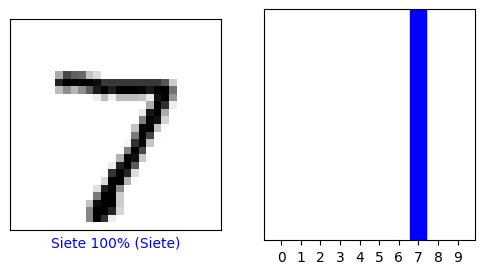

In [ ]:
#Grafica de la prediccion 1
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

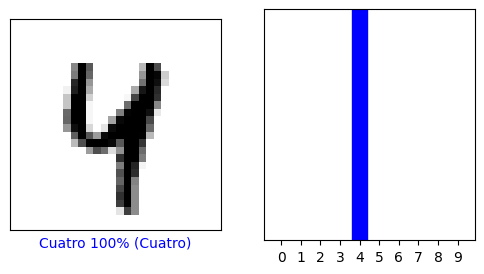

In [ ]:
#Grafica de la prediccion 2
i = 42
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

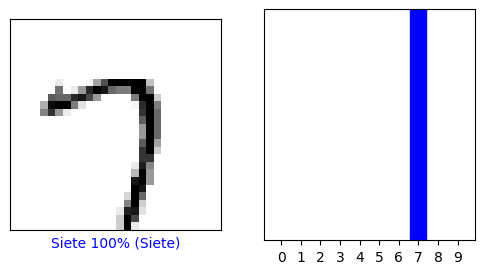

In [ ]:
#Grafica de la prediccion 3
i = 26
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

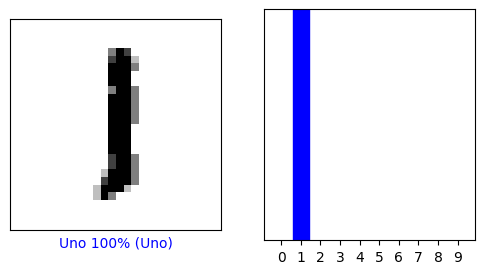

In [ ]:
#Grafica de la prediccion 4
i = 14
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

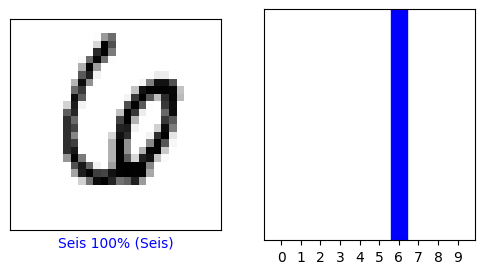

In [ ]:
#Grafica de la prediccion 5
i = 66
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

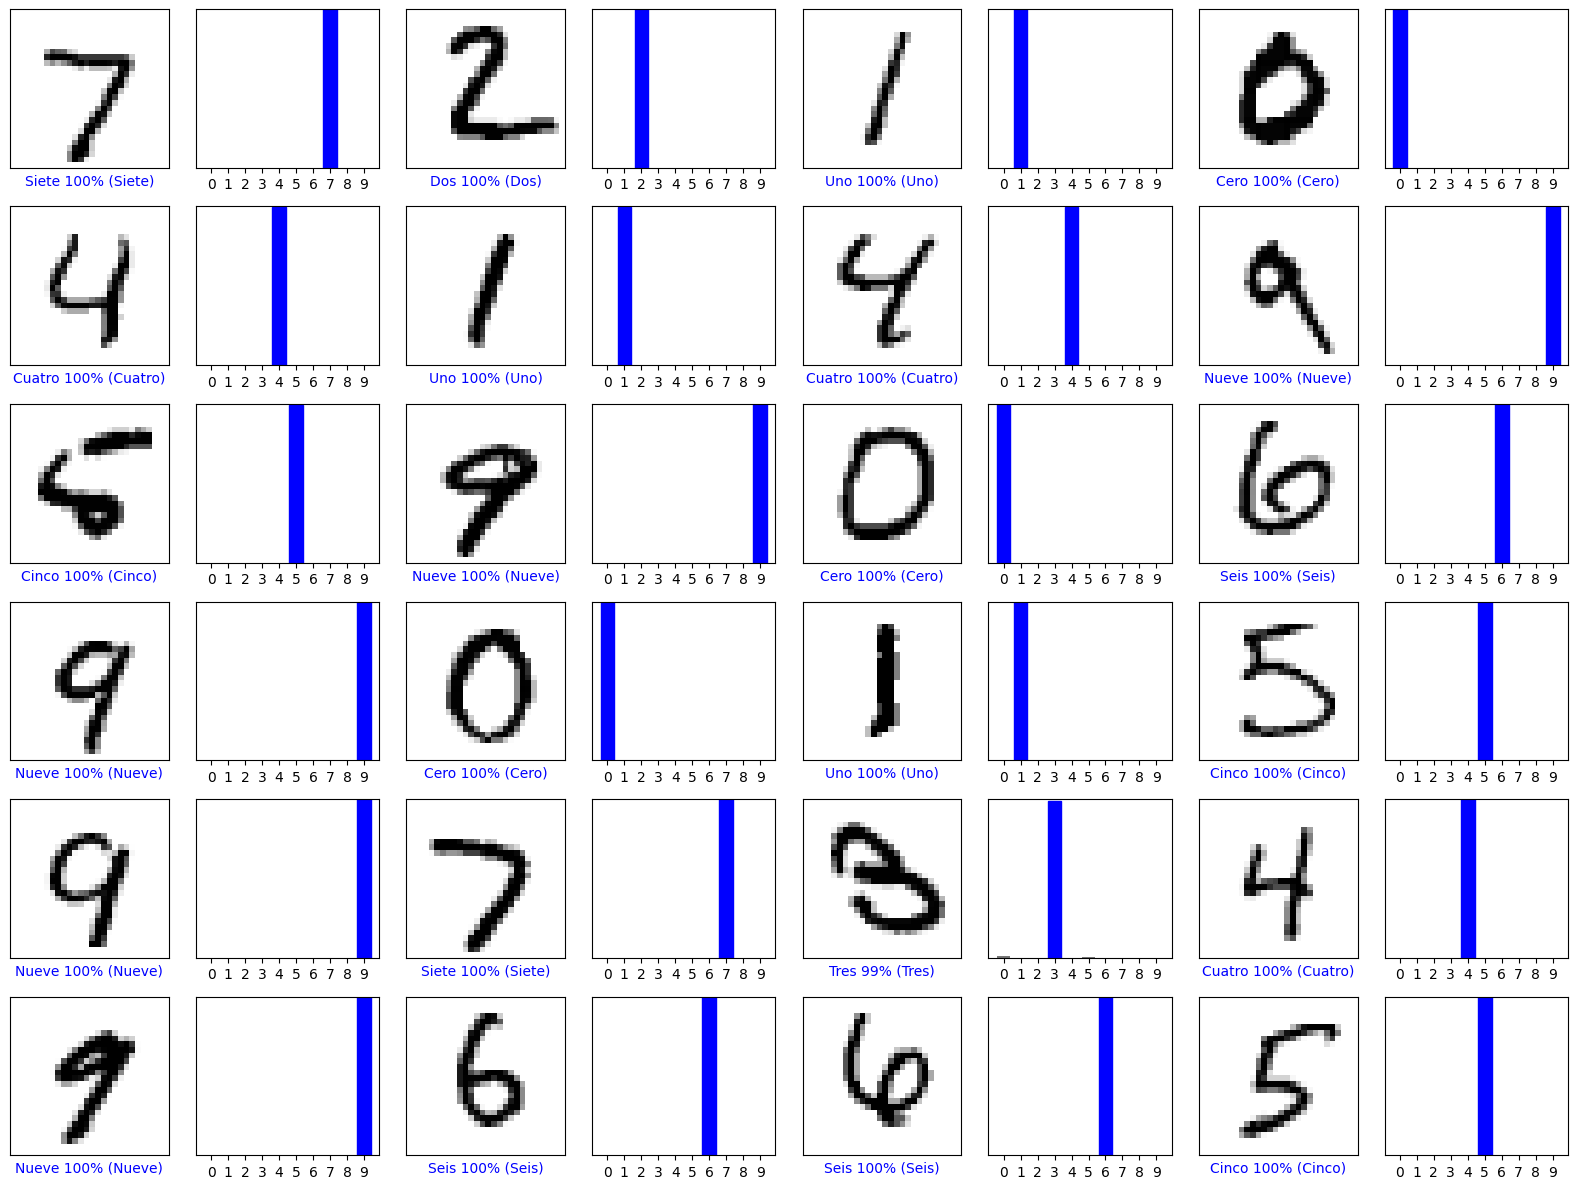

In [ ]:
#Graficar multiples imagenes
num_rows = 6
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
#¿Cuántas épocas usaste para mejorar el rendimiento del modelo en comparación con la red neuronal prealimentada de la actividad 5?
#Respuesta= Se utilizaron las mismas 10 que en la actividad pasada, pero por un error yo puse 5 epocas en la red neuronal básica.

#¿Obtuviste un mejor rendimiento con este modelo o con el de la actividad 5? ¿Por qué?
#Con este obtuve unos resultados más convincentes en cuanto a información con gráficos se refiere.